In [151]:
import json
import pandas as pd
import numpy as np
import re

In [26]:
file_dir = 'C://Users/zach1/Coding/Bootcamp/Projects/Movies-ETL/data/'
f'{file_dir}'

'C://Users/zach1/Coding/Bootcamp/Projects/Movies-ETL/data/'

In [27]:
with open (f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [28]:
kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}ratings.csv')

In [57]:
ratings.sample(10)

,userId,movieId,rating,timestamp
17171541,178300,5668,4.0,1444935879
6655199,68708,247,4.0,943181831
9856022,101619,1732,5.0,1225743563
13850701,143928,2403,2.0,969407890
21105411,219298,4087,2.0,1100972678
4618118,47412,2951,5.0,1108492953
24254317,251916,185,2.5,1180617748
9932738,102351,3176,4.0,1457221484
9273369,95705,2997,4.0,1099354623
11444041,118729,1221,4.5,1212655271


In [58]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [78]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [86]:
filled_columns = pd.Series(wiki_movies_df.count().tolist(), wiki_movies_df.columns.tolist()).sort_values(ascending=False)

In [111]:
wiki_movies = [movie for movie in wiki_movies_raw 
               if ('Director' in movie or 'Directed by' in movie)
               and 'imdb_link' in movie]
len(wiki_movies)


In [125]:
wiki_movies = [movie for movie in wiki_movies_raw 
               if ('Director' in movie or 'Directed by' in movie)
               and 'imdb_link' in movie
               and 'No. of episodes' not in movie]
wiki_movies_df = pd.DataFrame(wiki_movies)

In [133]:
def clean_movie(movie):
    movie = dict(movie) # Create a non-destructive copy
    alt_titles = {}
    
    # Combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
    
    # Merge coloumn names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Director', 'Directed by')
    change_column_name('Creator', 'Created by')
    change_column_name('Country', 'Country of origin')
    change_column_name('Country of Origin', 'Country of origin')
    change_column_name('Distributor', 'Distributed by')
    change_column_name('Editor(s)', 'Edited by')
    change_column_name('Producer', 'Produced by')
    change_column_name('Producer(s)', 'Produced by')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release date')
    change_column_name('Theme music composer', 'Composed by')
    change_column_name('Composer(s)', 'Composed by')
    change_column_name('Screen story by', 'Written by')
    change_column_name('Screenplay by', 'Written by')
    change_column_name('Story by', 'Written by')
    
    
        
    return movie

In [131]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [132]:
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composed by',
 'Country of origin',
 'Created by',
 'Directed by',
 'Distributed by',
 'Edited by',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [136]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.head()

7076


,url,year,imdb_link,title,Directed by,Produced by,Based on,Starring,Narrated by,Music by,...,Adaptation by,Suggested by,alt_titles,Recorded,Venue,Length,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay","[Cliff Eidelman, Yello]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Maurice Jarre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Charles Gross,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Maurice Jarre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [137]:
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7033


,url,year,imdb_link,title,Directed by,Produced by,Based on,Starring,Narrated by,Music by,...,Adaptation by,Suggested by,alt_titles,Recorded,Venue,Length,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay","[Cliff Eidelman, Yello]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Maurice Jarre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Charles Gross,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Maurice Jarre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [138]:
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Directed by', 0],
 ['Produced by', 202],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Music by', 593],
 ['Cinematography', 691],
 ['Edited by', 548],
 ['Distributed by', 357],
 ['Release date', 191],
 ['Running time', 141],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Country of origin', 236],
 ['Production company(s)', 1678],
 ['Written by', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Original release', 6874],
 ['Composed by', 6958],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Adaptation by', 7031],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Length', 7031],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7

In [141]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Based on,Starring,Music by,Cinematography,...,Distributed by,Release date,Running time,Language,Budget,Box office,Country of origin,Production company(s),Written by,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","[Cliff Eidelman, Yello]",Oliver Wood,...,20th Century Fox,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,English,$20 million,$21.4 million,United States,Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Maurice Jarre,Mark Plummer,...,Avenue Pictures,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,English,$6 million,$2.7 million,United States,Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Charles Gross,Roger Deakins,...,TriStar Pictures,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,"[English, Lao]",$35 million,"$57,718,089",United States,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,...,Orion Pictures,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,English,$12 million,"$7,331,647",United States,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Maurice Jarre,Russell Boyd,...,Paramount Pictures,"December 19, 1990",95 minutes,English,$25 million,"$6,939,946 (USA)",US,NaN,Paul Hogan,tt0099018


In [142]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Directed by              object
Produced by              object
Based on                 object
Starring                 object
Music by                 object
Cinematography           object
Edited by                object
Distributed by           object
Release date             object
Running time             object
Language                 object
Budget                   object
Box office               object
Country of origin        object
Production company(s)    object
Written by               object
imdb_id                  object
dtype: object

In [145]:
box_office = wiki_movies_df['Box office'].dropna()
len(box_office)

5485

In [148]:
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [173]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [176]:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+'

In [175]:
print(box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum())
print(box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum())

3907
1595


In [199]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

box_office[(~matches_form_one) & (~matches_form_two)]

600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3631                            TBA
3879       CN¥3.650 million (China)
4116                     £7,385,434
4306                            $30
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
Name: Box office, dtype: object

In [236]:
box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0]

0       $21.4 million
1        $2.7 million
2         $57,718,089
3          $7,331,647
4          $6,939,946
            ...      
7070    $19.4 million
7071    $41.9 million
7072    $76.1 million
7073    $38.4 million
7074     $5.5 million
Name: 0, Length: 5485, dtype: object

In [210]:
def parse_dollars(s):
    
    if type(s) != str:
        return np.nan
    
    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):
        # remove dollar sign and 'million'
        s = re.sub(r'\$\s*|[a-zA-Z]', '', s)
        # convert to float and multiply by a million
        value = float(s) * 10**6
        return value
    
    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):
        # remove dollar sign and 'billion'
        s = re.sub(r'\$\s*|[a-zA-Z]', '', s)
        # convert to float and multiply by a billion
        value = float(s) * 10**9
        return value
    
    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):
        # remove dollar sign and commas
        s = re.sub(r'\$|,', '', s)
        # convert to float
        value = float(s)
        return value
        
    else:
       return np.nan

In [237]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [238]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [240]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Based on',
 'Starring',
 'Music by',
 'Cinematography',
 'Edited by',
 'Distributed by',
 'Release date',
 'Running time',
 'Language',
 'Budget',
 'Country of origin',
 'Production company(s)',
 'Written by',
 'imdb_id',
 'box_office']

In [243]:
budget = wiki_movies_df['Budget'].dropna()
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [244]:
budget

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, Length: 4738, dtype: object

In [249]:
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[(~(budget.str.contains(form_one, flags=re.IGNORECASE, na=False))) & (~(budget.str.contains(form_two, flags=re.IGNORECASE, na=False)))]

C:\Users\zach1\zach1\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5424                            N/A
5447                     £4 million
5671                    €14 million
5687                   $ dead link]
6385                  £ 12 million 
6593                     £3 

In [251]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [252]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Based on',
 'Starring',
 'Music by',
 'Cinematography',
 'Edited by',
 'Distributed by',
 'Release date',
 'Running time',
 'Language',
 'Country of origin',
 'Production company(s)',
 'Written by',
 'imdb_id',
 'box_office',
 'budget']

In [254]:
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [259]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE).sample(15)

,0
5299,"July 18, 2011"
3855,"December 25, 2005"
2633,"April 28, 2000"
570,"April 10, 1992"
2066,"November 13, 1997"
5556,"March 11, 2012"
139,April 1990
2800,"June 27, 2001"
3543,September 2004
663,"February 14, 1992"


In [260]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)[0], infer_datetime_format=True)

In [320]:
#running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6892, dtype: object

In [279]:
temp = running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) !=True]
temp[temp.str.contains(r'(\d)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m', flags=re.IGNORECASE, na=False) !=True]

C:\Users\zach1\zach1\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


840       Varies (79 [3] –84 [1] minutes)
1551                               varies
5424    115 [1] /123 [2] /128 [3] minutes
Name: Running time, dtype: object

In [321]:
running_time_extract = running_time.str.extract(r'(\d)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m', flags=re.IGNORECASE)
running_time_extract

,0,1,2
0,NaN,NaN,102
1,NaN,NaN,114
2,NaN,NaN,113
3,NaN,NaN,106
4,NaN,NaN,95
...,...,...,...
7071,NaN,NaN,90
7072,NaN,NaN,132
7073,NaN,NaN,120
7074,NaN,NaN,123


In [322]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0) 
running_time_extract

,0,1,2
0,0.00,0.00,102.00
1,0.00,0.00,114.00
2,0.00,0.00,113.00
3,0.00,0.00,106.00
4,0.00,0.00,95.00
...,...,...,...
7071,0.00,0.00,90.00
7072,0.00,0.00,132.00
7073,0.00,0.00,120.00
7074,0.00,0.00,123.00


In [323]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [288]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [290]:
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [293]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True', 'False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [295]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [296]:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [297]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [298]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [299]:
ratings.info(null_counts=True)

C:\Users\zach1\zach1\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [302]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [303]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

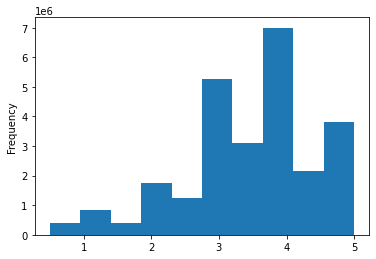

In [305]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

In [324]:
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

In [325]:
sorted(movies_df.columns.tolist(), key=str.casefold)

['Based on',
 'belongs_to_collection',
 'box_office',
 'budget_kaggle',
 'budget_wiki',
 'Cinematography',
 'Country of origin',
 'Directed by',
 'Distributed by',
 'Edited by',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'imdb_link',
 'Language',
 'Music by',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'Produced by',
 'Production company(s)',
 'production_companies',
 'production_countries',
 'Release date',
 'release_date_kaggle',
 'release_date_wiki',
 'revenue',
 'running_time',
 'runtime',
 'spoken_languages',
 'Starring',
 'status',
 'tagline',
 'title_kaggle',
 'title_wiki',
 'url',
 'video',
 'vote_average',
 'vote_count',
 'Written by',
 'year']

<table>
    <tr>
        <th>Wikipedia</th>
        <th>Kaggle</th>
        <th>Resolution</th>
    </tr>
    <tr>
        <td>title_wiki</td>
        <td>title_kaggle</td>
        <td><b>drop wikipedia</b></td>
    </tr>
    <tr>
        <td>running_time</td>
        <td>runtime</td>
        <td><b>Keep kaggle, fill in zeros with wiki data</b></td>
    </tr>
    <tr>
        <td>budget_wiki</td>
        <td>budget_kaggle</td>
        <td><b>Keep kaggle, fill in zeros with wiki data</b></td>
    </tr>
    <tr>
        <td>box_office</td>
        <td>revenue</td>
        <td><b>Keep kaggle, fill in zeros with wiki data</b></td>
    </tr>
    <tr>
        <td>release_date_wiki</td>
        <td>release_date_kaggle</td>
        <td><b>Drop wiki data</b></td>
    </tr>
    <tr>
        <td>Language</td>
        <td>original_language</td>
        <td><b>Drop wiki data</b></td>
    </tr>
    <tr>
        <td>Production Company(s)</td>
        <td>production_companies</td>
        <td><b>Drop wiki data</b></td>
    </tr>

In [326]:
movies_df[['title_wiki', 'title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [327]:
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [328]:
# Show any rows where title_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Directed by,Produced by,Based on,Starring,Music by,Cinematography,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


<AxesSubplot:xlabel='running_time', ylabel='runtime'>

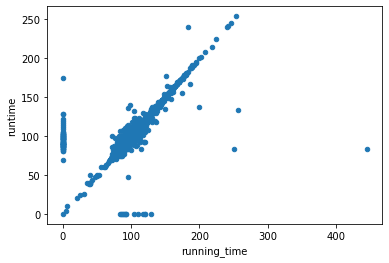

In [329]:
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

In [330]:
movies_df['running_time']

0                    102.00
1                    114.00
2                    113.00
3                    106.00
4                     95.00
               ...         
6047                 104.00
6048                  96.00
6049                 127.00
6050                  92.00
6051                 102.00
Name: running_time, Length: 6052, dtype: float64

<AxesSubplot:xlabel='budget_wiki', ylabel='budget_kaggle'>

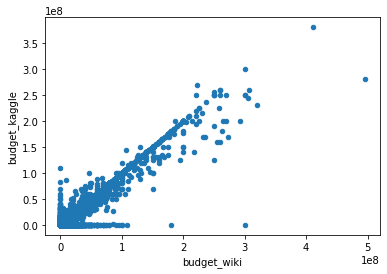

In [331]:
movies_df.fillna(0).plot(x='budget_wiki',y='budget_kaggle', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

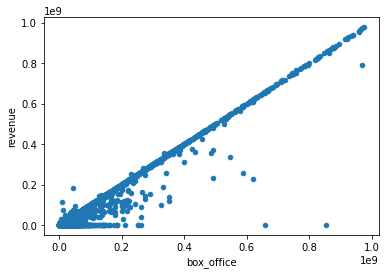

In [333]:
movies_df.fillna(0)[movies_df['box_office'] < 10**9].plot(x='box_office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='release_date_wiki'>

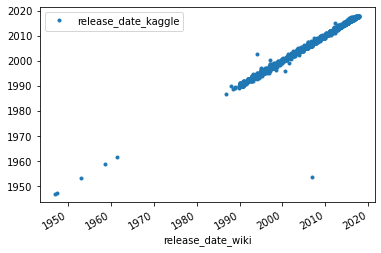

In [334]:
movies_df[['release_date_wiki','release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')

In [336]:
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index

Int64Index([3607], dtype='int64')

In [337]:
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index)

In [338]:
movies_df[movies_df['release_date_wiki'].isnull()]

,url,year,imdb_link,title_wiki,Directed by,Produced by,Based on,Starring,Music by,Cinematography,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
22,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,Roger Duchowny,"[Scott Maitland (co-producer), Bennett Tramer ...",NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",NaN,Peter Smokler,...,1990-09-23,0.00,93.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Camp Cucamonga,False,4.70,9.00
24,https://en.wikipedia.org/wiki/Cartoon_All-Star...,1990,https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,"[Milton Gray, Marsh Lamore, Bob Shellhorn, Mik...",Buzz Potamkin,NaN,NaN,NaN,NaN,...,1990-04-21,0.00,26.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Drugs don't stand a chance against these guys!,Cartoon All-Stars to the Rescue,False,6.00,5.00
28,https://en.wikipedia.org/wiki/The_China_Lake_M...,1990,https://www.imdb.com/title/tt0099259/,The China Lake Murders,Alan Metzger,"[William Beaudine Jr., Beth Tate (co-producer)]",NaN,"[Isaac Allan, Tom Skerritt, Michael Parks]",Dana Kaproff,Geoffrey Schaaf,...,1990-01-31,0.00,97.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Every year, Officer Donnelly goes to China Lak...",The China Lake Murders,False,0.00,0.00
186,https://en.wikipedia.org/wiki/Treasure_Island_...,1990,https://www.imdb.com/title/tt0100813/,Treasure Island,Fraser Clarke Heston,Fraser Clarke Heston,NaN,"[Charlton Heston, Christian Bale, Oliver Reed,...","[Paddy Moloney, ,, The Chieftains]",Robert Steadman,...,1990-06-08,0.00,131.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sail the high seas. Battle the pirates. Live t...,Treasure Island,False,5.60,36.00
330,https://en.wikipedia.org/wiki/Perfect_Harmony_...,1991,https://www.imdb.com/title/tt0102653/,Perfect Harmony,Will Mackenzie,"[Mickey Borofsky, Jean Higgins, (supervising p...",NaN,NaN,Billy Goldenberg,Robert D. Yeoman,...,1991-03-31,0.00,89.00,[],Released,NaN,Perfect Harmony,False,3.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823,https://en.wikipedia.org/wiki/44_Minutes:_The_...,2003,https://www.imdb.com/title/tt0362389/,44 Minutes: The North Hollywood Shoot-Out,Yves Simoneau,Daniel Schneider,NaN,"[Michael Madsen, Ron Livingston]",NaN,David Franco,...,2003-01-01,0.00,103.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,44 Minutes: The North Hollywood Shoot-Out,False,6.40,17.00
3174,https://en.wikipedia.org/wiki/Return_to_Sender...,2004,https://www.imdb.com/title/tt0396190/,Return to Sender,Bille August,NaN,NaN,"[Aidan Quinn, Connie Nielsen, Mark Holton]",Harry Gregson-Williams,NaN,...,2004-09-17,0.00,109.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"How can you save someone, who won't save herself?",Return to Sender,False,5.90,13.00
3390,https://en.wikipedia.org/wiki/No_Direction_Home,2005,https://www.imdb.com/title/tt0367555/,No Direction Home,Martin Scorsese,"[Susan Lacy, Jeff Rosen, Martin Scorsese, Nige...",NaN,Bob Dylan,NaN,Mustapha Barat,...,2005-07-21,0.00,208.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Bob Dylan. Songwriter. Rocker. Rebel. Legend.,No Direction Home: Bob Dylan,False,7.50,33.00
3651,https://en.wikipedia.org/wiki/Live_Free_or_Die...,2006,https://www.imdb.com/title/tt0432318/,Live Free or Die,"[Gregg Kavet, Andy Robin]",NaN,NaN,"[Aaron Stanford, Paul Schneider, Ebon Moss-Bac...",NaN,NaN,...,2006-03-11,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Free or Die,False,5.50,8.00


In [339]:
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)

English                        5479
NaN                             134
(English, Spanish)               68
(English, French)                35
(English, Japanese)              25
                               ... 
(English /, Zulu)                 1
(English, Hebrew, Spanish)        1
(English, Japanese, French)       1
(English, Spanish, Apache)        1
Russian                           1
Name: Language, Length: 198, dtype: int64

In [340]:
movies_df['original_language'].value_counts()

en    5987
fr      16
es      10
it       8
de       6
ja       4
pt       4
zh       4
da       2
hi       2
sv       1
ko       1
ab       1
tr       1
he       1
ar       1
cn       1
ru       1
Name: original_language, dtype: int64

In [341]:
movies_df[['Production company(s)', 'production_companies']]

,Production company(s),production_companies
0,Silver Pictures,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]","[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...,...
6047,"[Fabula, Komplizen Film]","[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6048,Ball & Chain Productions,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6049,"[Arte France Cinéma, Why Not Productions]","[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6050,"[Film Science, Rough House Pictures, Syncopate...","[{'name': 'Film Science', 'id': 1976}, {'name'..."


In [342]:
movies_df.drop(columns=['title_wiki','release_date_wiki','Language','Production company(s)'], inplace=True)

In [343]:
def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column]
        , axis=1)
    df.drop(columns=wiki_column, inplace=True)

In [346]:
fill_missing_kaggle_data(movies_df, 'running_time', 'runtime')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')

KeyError: "['runtime'] not found in axis"

In [356]:
movies_df.drop(columns=['Release date'], inplace=True)

In [357]:
sorted(movies_df.columns.to_list(), key=str.casefold)

['Based on',
 'belongs_to_collection',
 'budget_kaggle',
 'Cinematography',
 'Country of origin',
 'Directed by',
 'Distributed by',
 'Edited by',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'imdb_link',
 'Music by',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'Produced by',
 'production_companies',
 'production_countries',
 'release_date_kaggle',
 'revenue',
 'running_time',
 'spoken_languages',
 'Starring',
 'status',
 'tagline',
 'title_kaggle',
 'url',
 'video',
 'vote_average',
 'vote_count',
 'Written by',
 'year']

In [359]:
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].map(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

video


In [387]:
len(movies_df['video'].map(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False))

1

In [389]:
 [col for col in movies_df.columns if len(movies_df[col].map(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)) == 1]

['video']

In [361]:
movies_df['video'].value_counts(dropna=False)

False    6051
Name: video, dtype: int64

In [391]:
movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'Directed by',
 'Produced by',
 'Based on',
 'Starring',
 'Music by',
 'Cinematography',
 'Edited by',
 'Distributed by',
 'Country of origin',
 'Written by',
 'imdb_id',
 'running_time',
 'belongs_to_collection',
 'budget_kaggle',
 'genres',
 'homepage',
 'id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date_kaggle',
 'revenue',
 'spoken_languages',
 'status',
 'tagline',
 'title_kaggle',
 'video',
 'vote_average',
 'vote_count']

In [393]:
movies_df = movies_df.loc[:, ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'running_time','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country of origin',
                       'production_companies','production_countries','Distributed by',
                       'Produced by','Directed by','Starring','Cinematography','Edited by','Written by','Music by','Based on'
                      ]]

In [395]:
movies_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget_kaggle':'budget',
                  'release_date_kaggle':'release_date',
                  'Country of origin':'country',
                  'Distributed by':'distributor',
                  'Produced by':'producers',
                  'Directed by':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Edited by':'editors',
                  'Written by':'writers',
                  'Composed by':'composers',
                  'Based on':'based_on'
                 }, axis='columns', inplace=True)